In [1]:
import cv2
import numpy as np
import pandas as pd
import seaborn as ses
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,accuracy_score,f1_score


from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM,Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical ,load_img, img_to_array
from tensorflow.keras.optimizers import RMSprop,SGD
from tensorflow.keras.models import load_model
from keras import callbacks
from keras.callbacks import EarlyStopping,ReduceLROnPlateau

import random
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
image_generator = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1
                                )   

train_dataset = image_generator.flow_from_directory(batch_size=15,
                                                 directory='/content/drive/MyDrive/A.I Training data/Data_food/train/',
                                                 shuffle=True,
                                                 target_size=(250, 250), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=15,
                                                 directory='/content/drive/MyDrive/A.I Training data/Data_food/validation/',
                                                 shuffle=True,
                                                 target_size=(250, 250), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 400 images belonging to 10 classes.
Found 0 images belonging to 10 classes.


In [4]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(250,250,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy'],run_eagerly=True)

In [5]:
history=model.fit(train_dataset,batch_size=15,epochs=30,verbose=1,validation_data=validation_dataset)

Epoch 1/30
27/27 [==============================] - 141s 5s/step - loss: 2.5783 - accuracy: 0.2000
Epoch 2/30
27/27 [==============================] - 85s 3s/step - loss: 2.0783 - accuracy: 0.3175
Epoch 3/30
27/27 [==============================] - 85s 3s/step - loss: 1.9932 - accuracy: 0.3300
Epoch 4/30
27/27 [==============================] - 85s 3s/step - loss: 1.9758 - accuracy: 0.3625
Epoch 5/30
27/27 [==============================] - 85s 3s/step - loss: 1.6819 - accuracy: 0.4425
Epoch 6/30
27/27 [==============================] - 85s 3s/step - loss: 1.7873 - accuracy: 0.4300
Epoch 7/30
27/27 [==============================] - 84s 3s/step - loss: 1.7525 - accuracy: 0.4250
Epoch 8/30
27/27 [==============================] - 84s 3s/step - loss: 1.5067 - accuracy: 0.5050
Epoch 9/30
27/27 [==============================] - 84s 3s/step - loss: 1.5165 - accuracy: 0.5325
Epoch 10/30
27/27 [==============================] - 84s 3s/step - loss: 1.5183 - accuracy: 0.4850
Epoch 11/30
27/27 

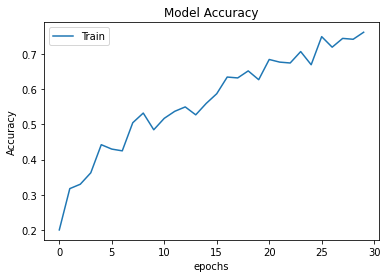

In [6]:
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['Train','validation'],loc='upper left')
plt.show()

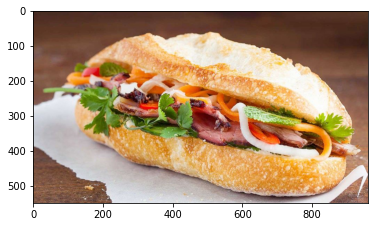

array([1])

In [8]:
filename = 'Banhmi.jpg'

img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

img = load_img(filename,target_size = (250,250))
img = img_to_array(img)
img =  img.reshape(1,250,250,3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img),axis= -1)

In [9]:
model.save('food_rec_30epochs.h5')